In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# data loading and preparing

In [89]:
data = pd.read_csv('./dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022.csv', index_col="accident_index")
data.head()

,status,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
accident_index,,,,,,,,,,,,,,,,,,,
2022070151244,Unvalidated,2022,070151244,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9,E01033378
2022070152668,Unvalidated,2022,070152668,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2,E01018551
2022070154696,Unvalidated,2022,070154696,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10,E01006134
2022070154696,Unvalidated,2022,070154696,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10,E01018724
2022070154696,Unvalidated,2022,070154696,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7,W01000578


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61352 entries, 2022070151244 to 2022461159841
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   status                              61352 non-null  object
 1   accident_year                       61352 non-null  int64 
 2   accident_reference                  61352 non-null  object
 3   vehicle_reference                   61352 non-null  int64 
 4   casualty_reference                  61352 non-null  int64 
 5   casualty_class                      61352 non-null  int64 
 6   sex_of_casualty                     61352 non-null  int64 
 7   age_of_casualty                     61352 non-null  int64 
 8   age_band_of_casualty                61352 non-null  int64 
 9   casualty_severity                   61352 non-null  int64 
 10  pedestrian_location                 61352 non-null  int64 
 11  pedestrian_movement                 613

# EDA

## status

In [91]:
data['status'].unique()

array(['Unvalidated'], dtype=object)

Every value in "status" column, is "Unvalidated".
So this column has nothing to tell and we can drop it.

In [92]:
data = data.drop(['status'], axis=1)

## accident_year

In [93]:
data.accident_year.unique()

array([2022], dtype=int64)

Every value in "accident_year" column, is "2022".
So this column has nothing to tell and we can drop it.

In [94]:
data = data.drop(['accident_year'], axis=1)

## accident_reference

In [95]:
data.accident_reference.unique()
# no problem with unique values
data.accident_reference.nunique()
# there is 48283 kind of values in this column

# trying to turn it to numeric tyupe
for value in data.accident_reference:
    try:
        float(value)
    except:
        print(value)
        break

170H10152


this column is a kind of code.
the nunique id too large to decode it.
it's almost different for every column.
so we refuse using it, because there is no information in this column.

In [96]:
data = data.drop(['accident_reference'], axis=1)

## vehicle_reference

In [97]:
data.vehicle_reference.unique()
# 277 and 61 should be checked

array([  2,   1,   3,   4,   5,   8,   6,   9, 227,   7,  61], dtype=int64)

In [98]:
data[ (data.vehicle_reference == 61) | (data.vehicle_reference == 227) ] 
# they are outlier data

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
accident_index,,,,,,,,,,,,,,,,
2022311153207,227,1,3,2,14,3,3,1,3,0,0,0,0,1,2,E01013947
2022311214493,61,1,1,1,21,5,3,0,0,0,0,0,3,2,8,E01028032


In [99]:
# turning this outliers values to None
vehicle_ref_outliers = data[ (data.vehicle_reference == 61) | (data.vehicle_reference == 227) ].index
for item in vehicle_ref_outliers:
    data.loc[item, 'vehicle_reference'] = None

## casualty_reference

In [100]:
data['casualty_reference'].unique() 
# 22 and 148 should be checked
data[(data['casualty_reference'] == 22) | (data['casualty_reference'] == 148)]
# they are outlier data

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
accident_index,,,,,,,,,,,,,,,,
2022231137324,1.0,22,2,1,24,5,3,0,0,1,0,0,9,1,6,E01009278
2022302200086,2.0,148,1,2,21,5,3,0,0,0,0,0,3,1,3,E01013471


In [101]:
# turning this outliers values to None
casualty_ref_outliers = data[ (data.casualty_reference == 22) | (data.casualty_reference == 148) ].index
for item in casualty_ref_outliers:
    data.loc[item, 'casualty_reference'] = None

## casualty_class

In [102]:
data.casualty_class.unique()
# no problem with unique values

array([1, 2, 3], dtype=int64)

<Axes: xlabel='casualty_class', ylabel='Count'>

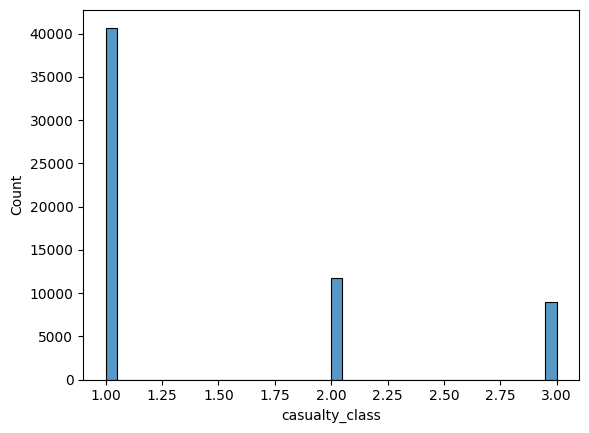

In [103]:
sns.histplot(data.casualty_class)
# a huge part of dataset is about class 1

In [104]:
data.sex_of_casualty.unique()
# no pattern detected in unique

array([ 2,  1, -1,  9], dtype=int64)

<Axes: xlabel='sex_of_casualty', ylabel='Count'>

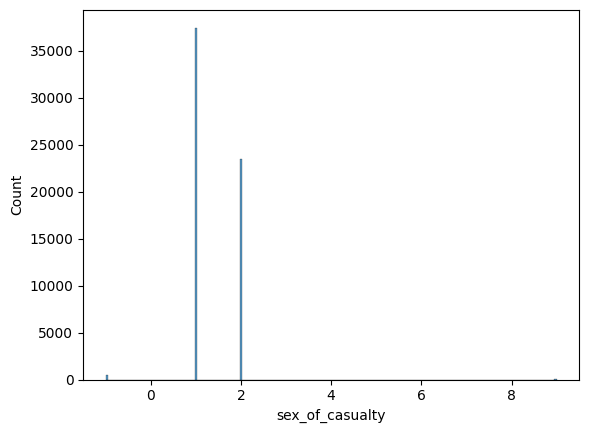

In [105]:
sns.histplot(data.sex_of_casualty)
# considering -1 and 9 as outliers

In [106]:
# turning this outliers values to None
sex_of_casualty_outliers = data[ (data.sex_of_casualty == -1) | (data.sex_of_casualty == 9) ].index
for item in sex_of_casualty_outliers:
    data.loc[item, 'sex_of_casualty'] = None

## age_of_casualty

In [111]:
data.age_of_casualty.unique()
# no problem with unique values
data.age_band_of_casualty.nunique()
# no problem with nunique values

array([ 46,  30,  58,  78,  63,  52,  50,  16,  74,  79,  13,  48,  45,
        28,  54,  42,  33,  34,   7,  20,  24,  18,  80,  14,  32,  19,
        59,  36,  84,  23,  43,  55,   5,  31,  25,  26,  21,  72,  15,
        22,  47,  86,  76,  61,  -1,  35,  51,  17,  68,  38,  73,  65,
        27,  66,  93,  77,  60,  69,  41,  67,  91,  70,  40,  29,  57,
        37,  53,  81,  12,  44,  39,  10,   8,  62,  56,  64,  49,   6,
        75,  92,   3,  11,  71,  82,   9,   4,   2,   0,  87,   1,  83,
        89,  88,  85,  96,  90,  99,  97,  94,  95,  98, 101], dtype=int64)

<Axes: xlabel='age_of_casualty', ylabel='Count'>

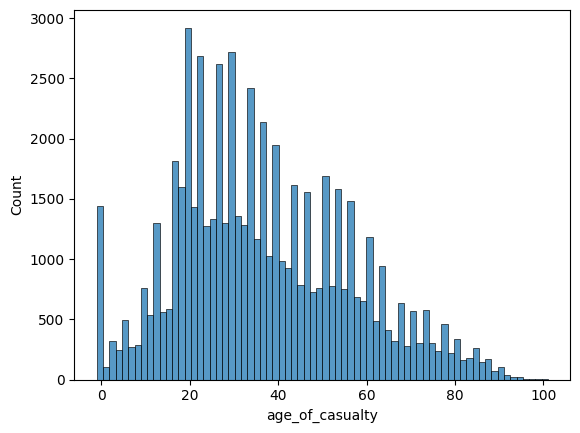

In [110]:
sns.histplot(data.age_of_casualty)
# there is a big bar for -1 
# and its not following the bell shape

In [115]:
data[data.age_of_casualty < 0]
# probable -1 is for null data 
# becuase it has a huge part in dataset
# and age can not be a negative value

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
accident_index,,,,,,,,,,,,,,,,
2022161138447,1.0,1.0,1,NaN,-1,-1,3,0,0,0,0,0,3,-1,-1,-1
2022141135113,1.0,1.0,2,1.0,-1,-1,3,0,0,0,2,0,11,2,3,E01019807
2022201179119,2.0,1.0,1,1.0,-1,-1,3,0,0,0,0,0,9,-1,-1,-1
2022201179119,2.0,2.0,2,1.0,-1,-1,3,0,0,1,0,0,9,-1,-1,-1
2022201179619,1.0,1.0,3,1.0,-1,-1,3,4,1,0,0,2,0,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022411142703,2.0,1.0,1,NaN,-1,-1,3,0,0,0,0,0,9,-1,-1,-1
2022201168992,2.0,3.0,2,1.0,-1,-1,3,0,0,1,0,0,9,1,8,E01009794
2022411146070,2.0,4.0,2,2.0,-1,-1,3,0,0,-1,0,0,9,1,4,E01023330


In [116]:
# turning -1 to None
null_age_of_casualty = data[ (data.age_of_casualty == -1)].index
for item in null_age_of_casualty:
    data.loc[item, 'age_of_casualty'] = None

## age_band_of_casualty

In [120]:
data.age_band_of_casualty.unique
# every thing ok but -1 in values

array([ 8,  6,  9, 11,  4, 10,  3,  7,  2,  5,  1, -1], dtype=int64)

<Axes: xlabel='age_band_of_casualty', ylabel='Count'>

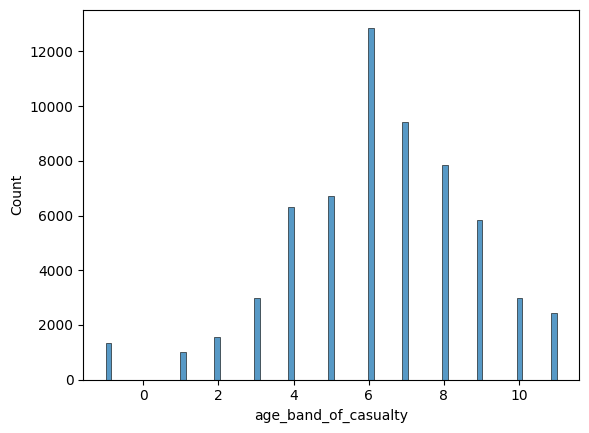

In [121]:
sns.histplot(data.age_band_of_casualty)
# a complete bell plot exept for 1 values 

In [122]:
# turning -1 to None
null_age_band_of_casualty = data[ (data.age_band_of_casualty == -1)].index
for item in null_age_band_of_casualty:
    data.loc[item, 'age_band_of_casualty'] = None

## casualty_severity

In [130]:
data.casualty_severity.unique()
# no problem with unique values
data.casualty_severity.nunique()
# no problem with nunique value

3

<Axes: xlabel='casualty_severity', ylabel='Count'>

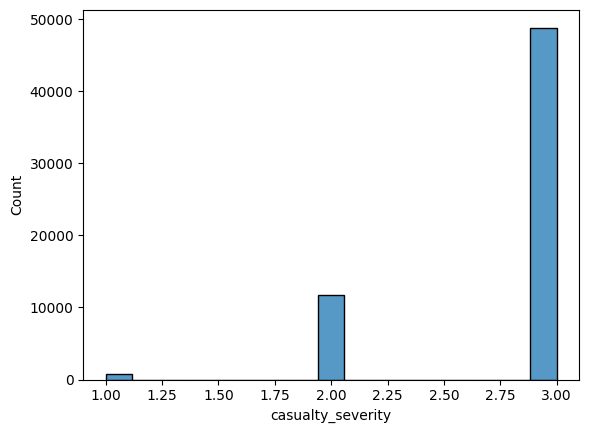

In [132]:
sns.histplot(data.casualty_severity)
# a huge part of dataset is about 3rd degree

In [148]:
(data[data.casualty_severity == 1].__len__() / len(data)) * 100
# 1.2% of accidents has casualty_severity as 1 so we drop this rows
data = data.drop(data[data.casualty_severity == 1].index)

## pedestrian_location

In [150]:
data.pedestrian_location.unique()
# no problem with unique values

array([ 0,  5, 10,  9,  6,  8,  1,  4,  7,  3,  2], dtype=int64)

<Axes: xlabel='pedestrian_location', ylabel='Count'>

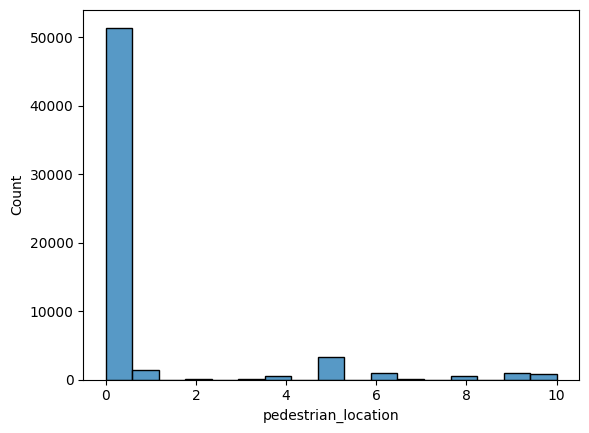

In [152]:
sns.histplot(data.pedestrian_location)

In [168]:
data[data.pedestrian_location == 0].__len__() / len(data)
# 85% of dataset has 0 as pedestrian_location
# so we can consider all of them as 0 
# infact we can drop this column
data = data.drop(['pedestrian_location'], axis=1)